In [1]:
import numpy as np
import solpolpy as sp
import matplotlib.pyplot as plt
import os
from astropy.io import fits
import astropy.units as u

# plot defaults
fontsize=18

# get test data
file_path="../tests/test_support_files/"
gamera_file_list_BpB=[file_path+"TBfor_DOICMEM_00000dens_only_gamera_format_0070.fits",
                      file_path+"PBfor_DOICMEM_00000dens_only_gamera_format_0070.fits"]

lasco_file_list_MZP=[file_path+"lasco_+60.fts",
                     file_path+"lasco_-60.fts",
                     file_path+"lasco_0.fts"]

lasco_file_list_BpB=[file_path+"lasco_clear.fts",
                    file_path+"lasco_-60.fts"]

stereo_file_list_MZP=[file_path+"stereo1.fts",
                      file_path+"stereo2.fts",
                      file_path+"stereo3.fts"]

/Users/jhughes/Desktop/repos/solpolpy/solpolpy/core.py:358: Warning: Input angles are not complimentary (total=360), processing but may not be accruate
  warnings.warn("Input angles are not complimentary (total=360), processing but may not be accruate", Warning )


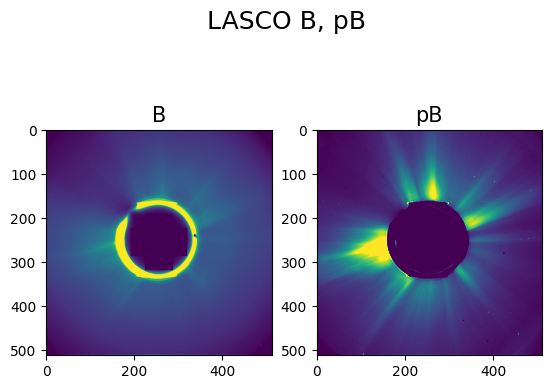

In [2]:
# LASCO MZP ->BpB

output=sp.resolve(lasco_file_list_MZP, 'BpB')

B_minval=np.nanpercentile(output['B'], 5.0)
B_maxval=np.nanpercentile(output['B'], 99.0)

pB_minval=np.nanpercentile(output['pB'], 5.0)
pB_maxval=np.nanpercentile(output['pB'], 99.0)

figure, ax=plt.subplots(1,2)
figure.suptitle("LASCO B, pB", fontsize=fontsize)

ax[0].imshow(output['B'], vmin=B_minval, vmax=B_maxval)
ax[0].set_title('B', fontsize=fontsize-3)

ax[1].imshow(output['pB'], vmin=pB_minval, vmax=pB_maxval)
ax[1].set_title('pB', fontsize=fontsize-3)

plt.show()

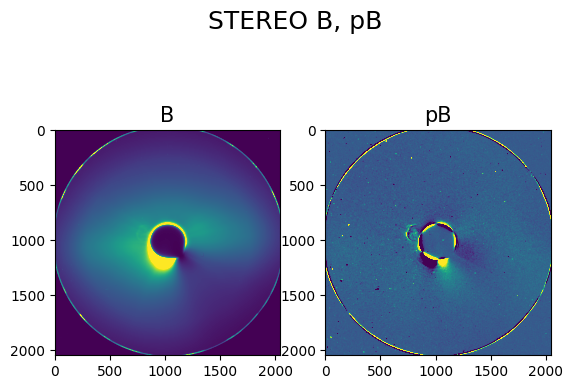

In [3]:
# STEREO MZP ->BpB

output=sp.resolve(stereo_file_list_MZP, 'BpB')

B_minval=np.nanpercentile(output['B'], 5.0)
B_maxval=np.nanpercentile(output['B'], 99.0)

pB_minval=np.nanpercentile(output['pB'], 5.0)
pB_maxval=np.nanpercentile(output['pB'], 99.0)

figure, ax=plt.subplots(1,2)
figure.suptitle("STEREO B, pB", fontsize=fontsize)

ax[0].imshow(output['B'], vmin=B_minval, vmax=B_maxval)
ax[0].set_title('B', fontsize=fontsize-3)

ax[1].imshow(output['pB'], vmin=pB_minval, vmax=pB_maxval)
ax[1].set_title('pB', fontsize=fontsize-3)

#ax[2].imshow(Ratio, vmin=Ratio_minval, vmax=Ratio_maxval)
#ax[2].set_title('Ratio', fontsize=fontsize-3)

plt.show()

/var/folders/w3/c3fpftqj0cn3zdjqpnn7ds31hdhdts/T/ipykernel_10351/1263770523.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


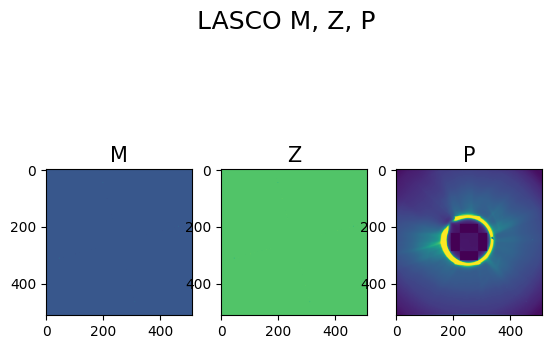

In [4]:
# LASCO BpB -> MZP

output=sp.resolve(lasco_file_list_BpB, 'MZP', alpha='radial')

M_data=output[-60*u.degree]
M_minval=np.nanpercentile(M_data, 0.0)
M_maxval=np.nanpercentile(M_data, 100.0)

Z_data=output[0*u.degree]
Z_minval=np.nanpercentile(Z_data, 0.0)
Z_maxval=np.nanpercentile(Z_data, 100.0)

P_data=output[60*u.degree]
P_minval=np.nanpercentile(P_data, 0.0)
P_maxval=np.nanpercentile(P_data, 100.0)


figure, ax=plt.subplots(1,3)
figure.suptitle("LASCO M, Z, P", fontsize=fontsize)

ax[0].imshow(M_data, vmin=M_minval, vmax=M_maxval)
ax[0].set_title('M', fontsize=fontsize-3)

ax[1].imshow(Z_data, vmin=Z_minval, vmax=Z_maxval)
ax[1].set_title('Z', fontsize=fontsize-3)

ax[2].imshow(P_data, vmin=P_minval, vmax=P_maxval)
ax[2].set_title('P', fontsize=fontsize-3)
figure.show()

<IPython.core.display.Javascript object>


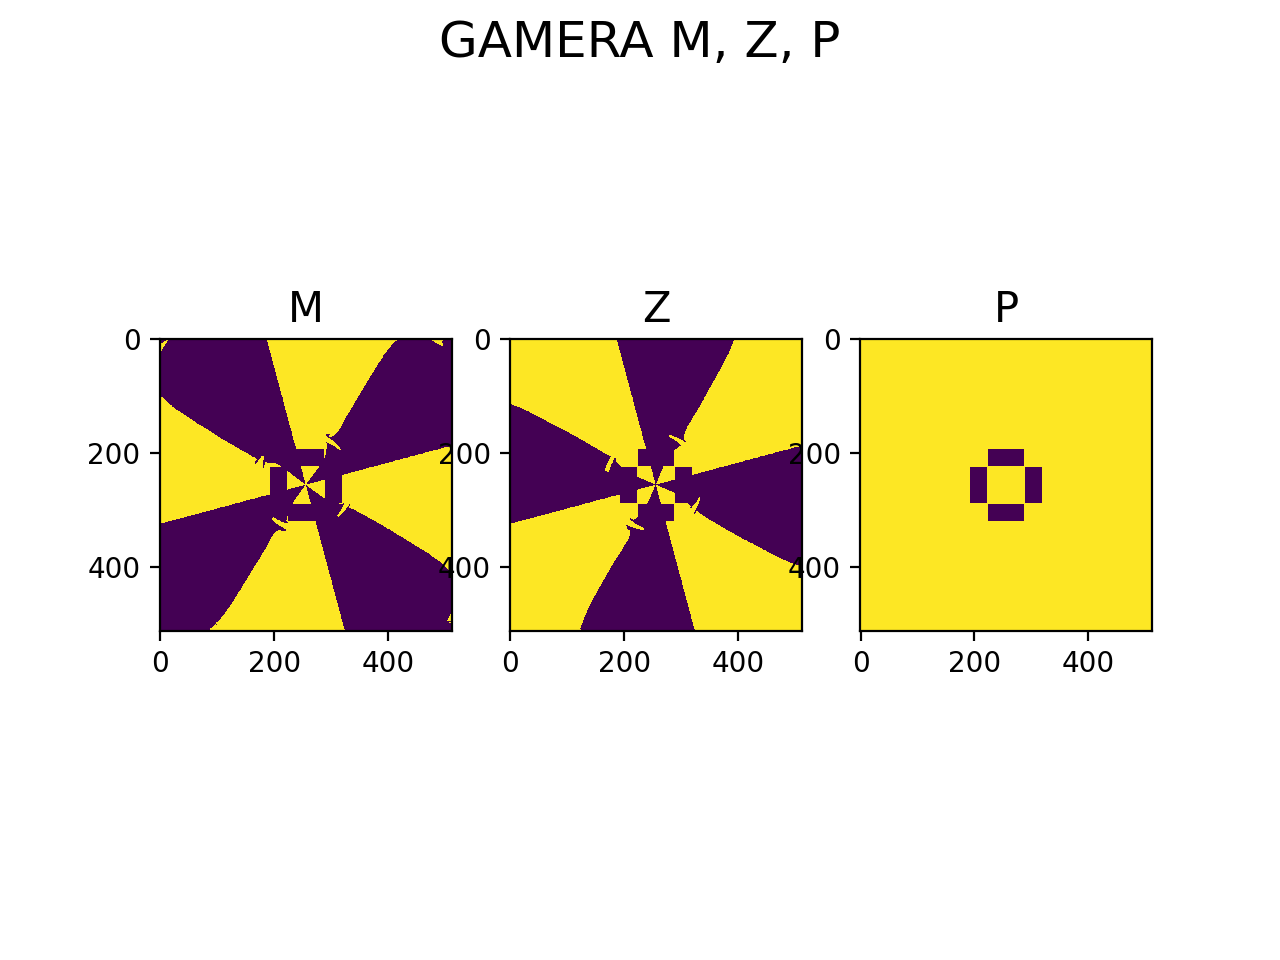

In [5]:
# Gamera BpB -> MZP

#output=sp.resolve(gamera_file_list_BpB, 'MZP')

data_out={}
    
hdul = fits.open(gamera_file_list_BpB[1])
pBdata_synth=hdul[0].data
pBdata_synth[pBdata_synth==-9999.0]=np.nan
data_out['pB']=pBdata_synth

hdul = fits.open(gamera_file_list_BpB[0])
tBdata_synth=hdul[0].data
tBdata_synth[tBdata_synth==-9999.0]=np.nan
data_out['B']=tBdata_synth
#ratioData_synth=pBdata_synth/tBdata_synth

output_gamera=sp.resolve(data_out, 'MZP', alpha='radial90')
#output_plot=output[-60*u.degree]

M_minval=np.nanpercentile(output_gamera[-60*u.degree], 5.0)
M_maxval=np.nanpercentile(output_gamera[-60*u.degree], 99.0)

Z_minval=np.nanpercentile(output_gamera[0*u.degree], 5.0)
Z_maxval=np.nanpercentile(output_gamera[0*u.degree], 99.0)

P_minval=np.nanpercentile(output_gamera[60*u.degree], 5.0)
P_maxval=np.nanpercentile(output_gamera[60*u.degree], 99.0)

figure, ax=plt.subplots(1,3)
figure.suptitle("GAMERA M, Z, P", fontsize=fontsize)

ax[0].imshow(output[-60*u.degree], vmin=M_minval, vmax=M_maxval)
ax[0].set_title('M', fontsize=fontsize-3)

ax[1].imshow(output[0*u.degree], vmin=Z_minval, vmax=Z_maxval)
ax[1].set_title('Z', fontsize=fontsize-3)

ax[2].imshow(output[60*u.degree], vmin=P_minval, vmax=P_maxval)
ax[2].set_title('P', fontsize=fontsize-3)
figure.show()

<IPython.core.display.Javascript object>


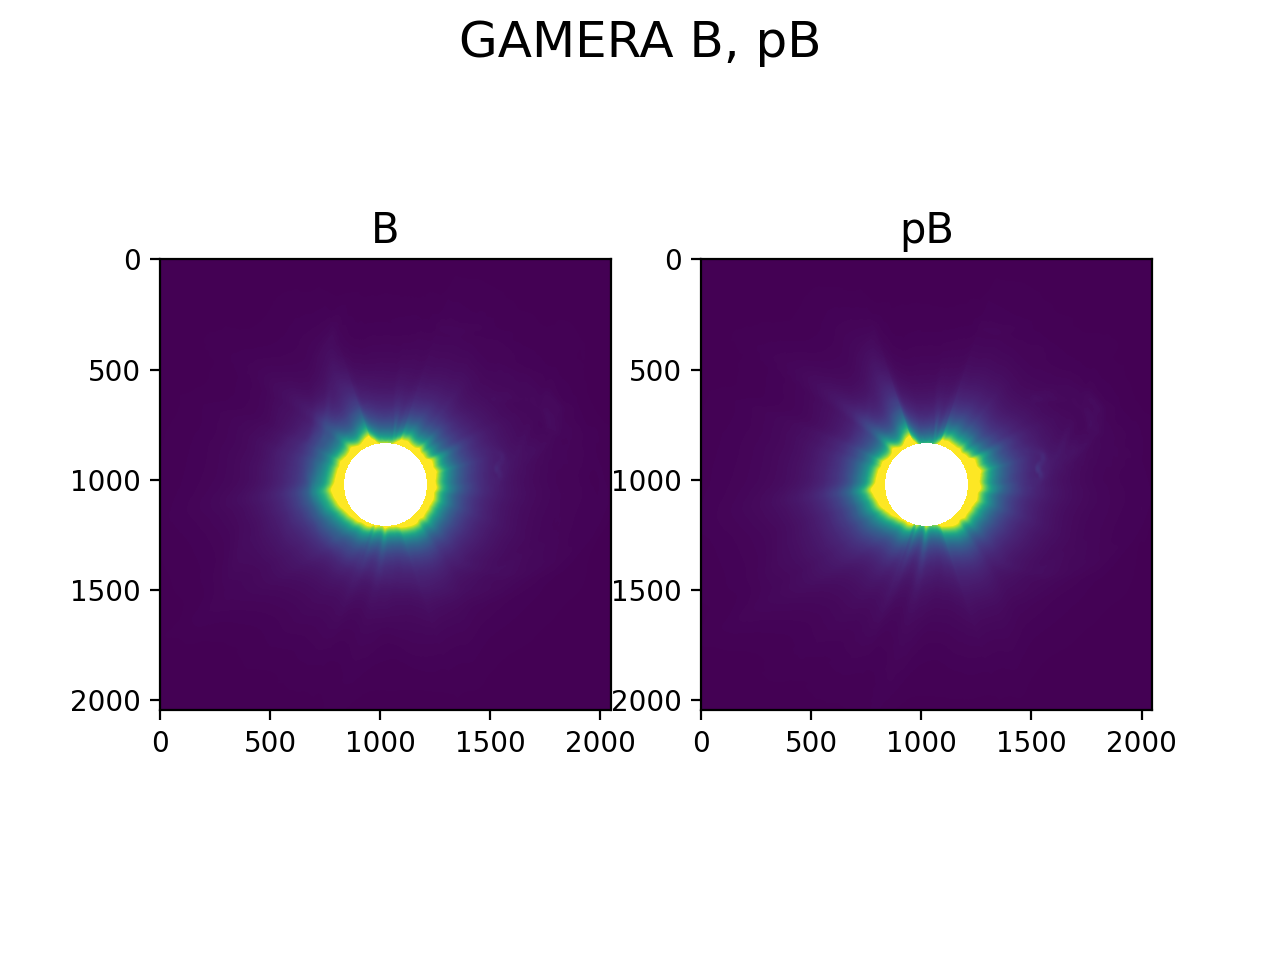

In [6]:
# GaMERA MZP -> BpB
output2=sp.resolve(output_gamera, 'BpB')

B_minval=np.nanpercentile(output2['B'], 5.0)
B_maxval=np.nanpercentile(output2['B'], 99.0)

pB_minval=np.nanpercentile(output2['pB'], 5.0)
pB_maxval=np.nanpercentile(output2['pB'], 99.0)

figure, ax=plt.subplots(1,2)
figure.suptitle("GAMERA B, pB", fontsize=fontsize)

ax[0].imshow(output2['B'], vmin=B_minval, vmax=B_maxval)
ax[0].set_title('B', fontsize=fontsize-3)

ax[1].imshow(output2['pB'], vmin=pB_minval, vmax=pB_maxval)
ax[1].set_title('pB', fontsize=fontsize-3)

#ax[2].imshow(Ratio, vmin=Ratio_minval, vmax=Ratio_maxval)
#ax[2].set_title('Ratio', fontsize=fontsize-3)

plt.show()

<IPython.core.display.Javascript object>


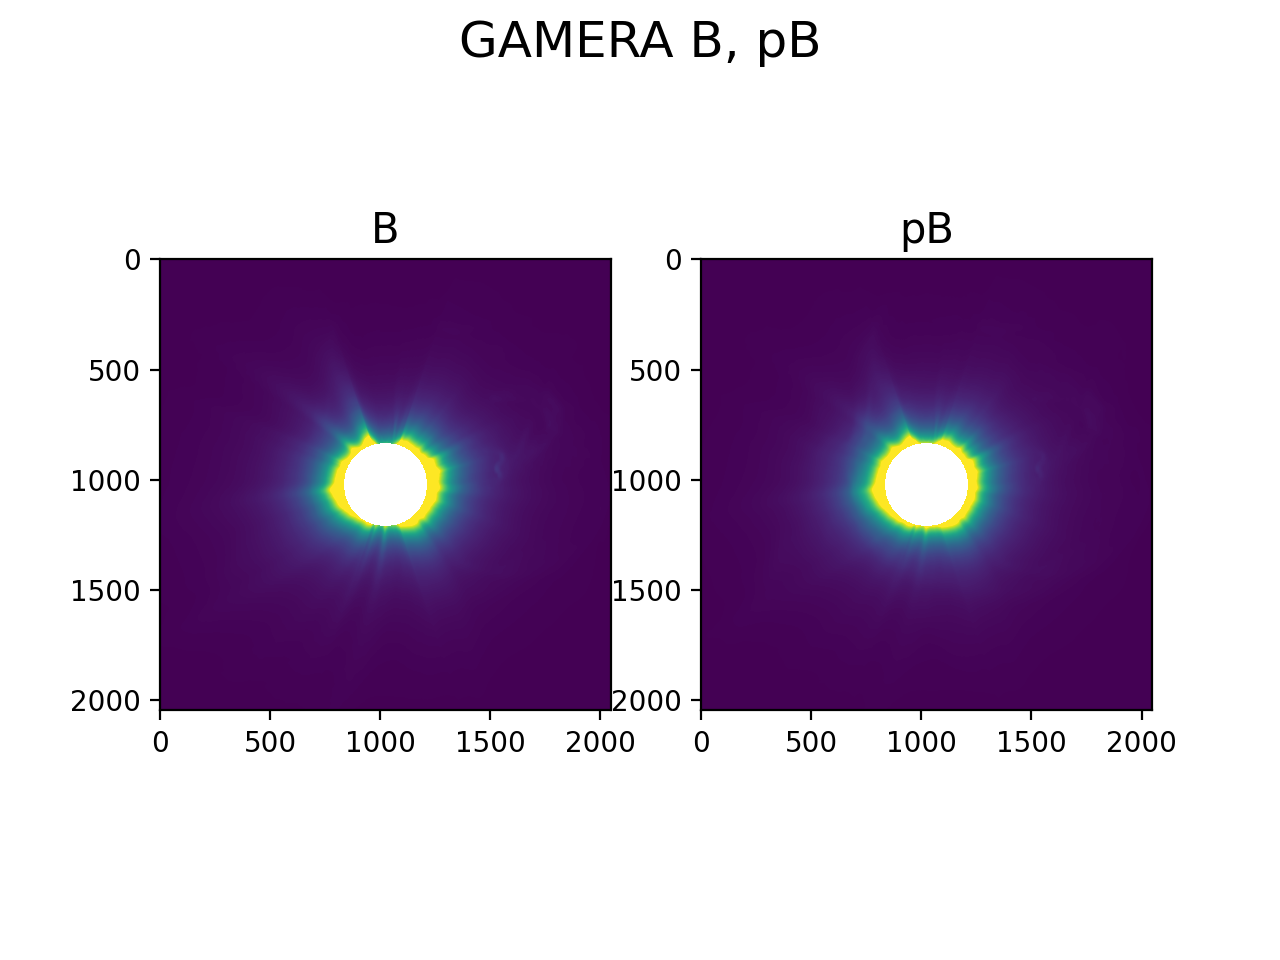

In [7]:
data_out={}
    
hdul = fits.open(gamera_file_list_BpB[0])
pBdata_synth=hdul[0].data
pBdata_synth[pBdata_synth==-9999.0]=np.nan

hdul = fits.open(gamera_file_list_BpB[1])
tBdata_synth=hdul[0].data
tBdata_synth[tBdata_synth==-9999.0]=np.nan


# LASCO MZP -> BpB
output2={}
output2['B']=tBdata_synth
output2['pB']=pBdata_synth


B_minval=np.nanpercentile(output2['B'], 5.0)
B_maxval=np.nanpercentile(output2['B'], 99.0)

pB_minval=np.nanpercentile(output2['pB'], 5.0)
pB_maxval=np.nanpercentile(output2['pB'], 99.0)

figure, ax=plt.subplots(1,2)
figure.suptitle("GAMERA B, pB", fontsize=fontsize)

ax[0].imshow(output2['B'], vmin=B_minval, vmax=B_maxval)
ax[0].set_title('B', fontsize=fontsize-3)

ax[1].imshow(output2['pB'], vmin=pB_minval, vmax=pB_maxval)
ax[1].set_title('pB', fontsize=fontsize-3)

#ax[2].imshow(Ratio, vmin=Ratio_minval, vmax=Ratio_maxval)
#ax[2].set_title('Ratio', fontsize=fontsize-3)

plt.show()
